# Visualización y entrenamiento de un modelo de Regresión lineal con scikit-learn

## Importando dependencias

In [ ]:
import pandas as pd # Manejo de datos
import seaborn as sns # Creación de gráficas y visualización de datos
import matplotlib.pyplot as plt # Dependencia para crear gráficos

## Explorando nuestro set de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Platzi/Datacademy/studentsperformance.csv')

In [ ]:
df.head() 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape # Cantidad de registros y columnas

(1000, 8)

In [ ]:
# Como buena practica quitaremos los epacios y signos de los nombres de las columnas
df.columns = [column.replace(' ','_').replace('/','_') for column in df.columns] 
# Columnas
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [ ]:
df.dtypes # Muestra el tipo o naturaleza de cada una de las columnas

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Creando un histograma

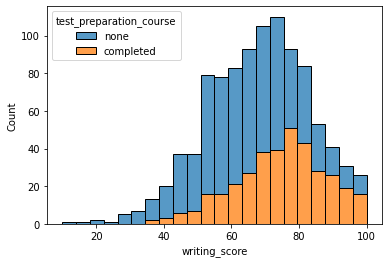

In [ ]:
sns.histplot(data=df, x='writing_score', hue='test_preparation_course', multiple='stack')

### Visualizando nuestros datos

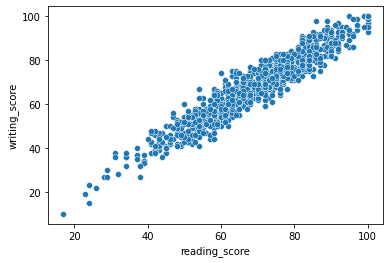

In [ ]:
sns.scatterplot(data=df, x='reading_score', y='writing_score')

### Creando una tabla de frecuencias

In [ ]:
freq = df['writing_score'].value_counts() # Devuelve la frecuencia
df_freq = freq.to_frame() # Parse column to dDF
df_freq.reset_index(inplace=True) # inplace=True: Que los indices los deje dentro del DF
df_freq = df_freq.rename(columns={'index': 'writing_score', 'writing_score': 'number_of_students'})
df_freq

,writing_score,number_of_students
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


### Promedio de los puntajes

In [ ]:
df.mean() # Promedio de los valores numericos

math_score       66.089
reading_score    69.169
writing_score    68.054
dtype: float64

### Mediana de los puntajes

In [ ]:
df.median() # Mediana de los valores numericos

math_score       66.0
reading_score    70.0
writing_score    69.0
dtype: float64

## Entrenando nuestro modelo

***x*** será el puntaje de lectura
y ***y*** sera el puntaje de escritura

Suponemos que si obtienen un buen puntaje en el test de lectura deben obtener un mayor puntaje en el test escritura

In [ ]:
X = df['reading_score'].values
Y = df['writing_score'].values

X = X.reshape(-1, 1)

# Dividiremos nuestros datos de la muestra en dos para tener una muestra para entrenar el modelo y otra para testear el modelo
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.2)

In [ ]:
# Regresion lineal
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, Y_train)

print('La pendiente es: ',reg.coef_)
print('El bayas es: ',reg.intercept_)
print(reg.score(X_train, Y_train)) # nos dice que tan relacionadas estan nuestras variables

La pendiente es:  [0.99038903]
El bayas es:  -0.6415063441133952
0.9077378079077829


## Visualización de nuestro modelo entrenado

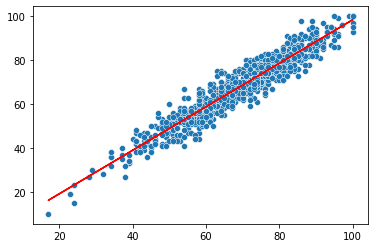

In [ ]:
x_flat = X_train.flatten() # parse tensor to array

y_hat = reg.predict(X_train)

fig, ax = plt.subplots()
sns.scatterplot(x=x_flat, y=Y_train)
plt.plot(X_train,y_hat, color='r')


## Evaluación de nuestro modelo

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_test)

# Calcular el mean squared error
print(mean_squared_error(Y_test, y_pred))

18.65761263577471


In [ ]:
value = pd.DataFrame({'actual_test': Y_test.flatten(), 'predict': y_pred.flatten()})
value

,actual_test,predict
0,93,90.474284
1,50,52.839501
2,38,30.060553
3,83,79.580005
4,67,62.743391
...,...,...
195,57,54.820279
196,54,59.772224
197,62,65.714558
198,73,65.714558
